In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

17

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/45".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/45
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.51949 stdev: 0.08536
Best fitness: 0.72294 - size: (2, 13) - species 3 - id 78
Average adjusted fitness: 0.191
Mean genetic distance 2.874, standard deviation 0.482
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.688 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55373 stdev: 0.08513
Best fitness: 0.72294 - size: (2, 13) - species 3 - id 78
Average adjusted fitness: 0.258
Mean genetic distance 2.944, standard deviation 0.496
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 8.445 sec (8.066 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57062 stdev: 0.08499
Best fitness: 0.72294 - size: (2, 13) - species 10 - id 78
Average adjusted fitness: 0.294
Mean genetic distance 2.986, standard deviation 0.513
Population of 200 members in 26 species
Tota

Population's average fitness: 0.64656 stdev: 0.09491
Best fitness: 0.79468 - size: (9, 25) - species 18 - id 2878
Average adjusted fitness: 0.254
Mean genetic distance 3.172, standard deviation 0.513
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 10.297 sec (9.877 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64636 stdev: 0.09492
Best fitness: 0.79468 - size: (9, 25) - species 18 - id 2878
Average adjusted fitness: 0.276
Mean genetic distance 3.187, standard deviation 0.508
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 9.754 sec (9.903 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64365 stdev: 0.09296
Best fitness: 0.79468 - size: (9, 25) - species 18 - id 2878
Average adjusted fitness: 0.275
Mean genetic distance 3.162, standard deviation 0.511
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 10.670 sec (10.022 average)

 ***

Population's average fitness: 0.64722 stdev: 0.09642
Best fitness: 0.79468 - size: (9, 25) - species 18 - id 2878
Average adjusted fitness: 0.276
Mean genetic distance 3.358, standard deviation 0.559
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 11.321 sec (11.262 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64738 stdev: 0.09900
Best fitness: 0.79468 - size: (9, 25) - species 18 - id 2878
Average adjusted fitness: 0.274
Mean genetic distance 3.352, standard deviation 0.571
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 11.566 sec (11.301 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.64440 stdev: 0.09491
Best fitness: 0.79468 - size: (9, 25) - species 18 - id 2878
Average adjusted fitness: 0.256
Mean genetic distance 3.338, standard deviation 0.568
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 11.233 sec (11.390 average)

 

Population's average fitness: 0.58632 stdev: 0.08881
Best fitness: 0.74706 - size: (4, 14) - species 10 - id 818
Average adjusted fitness: 0.234
Mean genetic distance 3.089, standard deviation 0.464
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 10.440 sec (8.662 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59268 stdev: 0.09631
Best fitness: 0.75881 - size: (3, 15) - species 29 - id 1096
Average adjusted fitness: 0.296
Mean genetic distance 3.076, standard deviation 0.478
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 11.546 sec (9.074 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59307 stdev: 0.10049
Best fitness: 0.75881 - size: (3, 15) - species 29 - id 1096
Average adjusted fitness: 0.251
Mean genetic distance 3.059, standard deviation 0.489
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 11.793 sec (9.414 average)

 ******

Population's average fitness: 0.64339 stdev: 0.10564
Best fitness: 0.81076 - size: (6, 21) - species 33 - id 3704
Average adjusted fitness: 0.268
Mean genetic distance 3.206, standard deviation 0.519
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 9.886 sec (10.551 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.64774 stdev: 0.11098
Best fitness: 0.81076 - size: (6, 21) - species 33 - id 3704
Average adjusted fitness: 0.274
Mean genetic distance 3.204, standard deviation 0.522
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 11.222 sec (10.654 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64134 stdev: 0.10928
Best fitness: 0.81076 - size: (6, 21) - species 33 - id 3704
Average adjusted fitness: 0.262
Mean genetic distance 3.202, standard deviation 0.522
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 11.258 sec (10.727 average)

 *

Population's average fitness: 0.64688 stdev: 0.11340
Best fitness: 0.82931 - size: (8, 24) - species 33 - id 7154
Average adjusted fitness: 0.322
Mean genetic distance 3.173, standard deviation 0.588
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 10.969 sec (10.888 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.65848 stdev: 0.10768
Best fitness: 0.82931 - size: (8, 24) - species 33 - id 7154
Average adjusted fitness: 0.280
Mean genetic distance 3.176, standard deviation 0.560
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 11.113 sec (10.904 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64849 stdev: 0.10769
Best fitness: 0.82931 - size: (8, 24) - species 33 - id 7154
Average adjusted fitness: 0.283
Mean genetic distance 3.162, standard deviation 0.560
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 12.690 sec (11.133 average)

 

Population's average fitness: 0.69099 stdev: 0.14271
Best fitness: 0.86580 - size: (5, 17) - species 11 - id 1605
Average adjusted fitness: 0.416
Mean genetic distance 3.158, standard deviation 0.488
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 11.033 sec (10.496 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69994 stdev: 0.13817
Best fitness: 0.86580 - size: (5, 17) - species 11 - id 1605
Average adjusted fitness: 0.488
Mean genetic distance 3.155, standard deviation 0.484
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 11.236 sec (10.708 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.69946 stdev: 0.13692
Best fitness: 0.89239 - size: (6, 19) - species 15 - id 1905
Average adjusted fitness: 0.404
Mean genetic distance 3.172, standard deviation 0.483
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 10.009 sec (10.799 average)

 

Population's average fitness: 0.73860 stdev: 0.13771
Best fitness: 0.89239 - size: (6, 19) - species 15 - id 1905
Average adjusted fitness: 0.465
Mean genetic distance 3.233, standard deviation 0.496
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 11.355 sec (11.626 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.72282 stdev: 0.14931
Best fitness: 0.89239 - size: (6, 19) - species 15 - id 1905
Average adjusted fitness: 0.419
Mean genetic distance 3.257, standard deviation 0.502
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 11.227 sec (11.634 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.72643 stdev: 0.15033
Best fitness: 0.89239 - size: (6, 19) - species 15 - id 1905
Average adjusted fitness: 0.563
Mean genetic distance 3.260, standard deviation 0.510
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 10.802 sec (11.531 average)

 

Population's average fitness: 0.72098 stdev: 0.16078
Best fitness: 0.89858 - size: (7, 22) - species 15 - id 7494
Average adjusted fitness: 0.461
Mean genetic distance 3.279, standard deviation 0.551
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 12.547 sec (13.242 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.72292 stdev: 0.16465
Best fitness: 0.89858 - size: (7, 22) - species 15 - id 7494
Average adjusted fitness: 0.505
Mean genetic distance 3.280, standard deviation 0.554
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 11.907 sec (13.192 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.72785 stdev: 0.15140
Best fitness: 0.89858 - size: (7, 22) - species 15 - id 7494
Average adjusted fitness: 0.475
Mean genetic distance 3.268, standard deviation 0.552
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 12.908 sec (13.108 average)

 

Population's average fitness: 0.61762 stdev: 0.08310
Best fitness: 0.75758 - size: (3, 16) - species 31 - id 982
Average adjusted fitness: 0.311
Mean genetic distance 3.183, standard deviation 0.479
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 9.175 sec (9.436 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62188 stdev: 0.07472
Best fitness: 0.75758 - size: (3, 16) - species 31 - id 982
Average adjusted fitness: 0.272
Mean genetic distance 3.175, standard deviation 0.476
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 9.749 sec (9.466 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61612 stdev: 0.08546
Best fitness: 0.75758 - size: (3, 16) - species 31 - id 982
Average adjusted fitness: 0.239
Mean genetic distance 3.183, standard deviation 0.486
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 9.638 sec (9.541 average)

 ****** Ru

Population's average fitness: 0.63280 stdev: 0.08959
Best fitness: 0.77613 - size: (10, 31) - species 8 - id 5319
Average adjusted fitness: 0.279
Mean genetic distance 3.240, standard deviation 0.530
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 11.685 sec (11.261 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.63542 stdev: 0.08830
Best fitness: 0.77613 - size: (10, 31) - species 8 - id 5319
Average adjusted fitness: 0.270
Mean genetic distance 3.230, standard deviation 0.528
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 11.488 sec (11.287 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.63381 stdev: 0.08958
Best fitness: 0.77613 - size: (10, 31) - species 8 - id 5319
Average adjusted fitness: 0.253
Mean genetic distance 3.246, standard deviation 0.507
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 11.734 sec (11.399 average)

 

Population's average fitness: 0.63818 stdev: 0.09496
Best fitness: 0.78479 - size: (4, 18) - species 42 - id 8961
Average adjusted fitness: 0.289
Mean genetic distance 3.113, standard deviation 0.565
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 11.360 sec (11.892 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.63364 stdev: 0.09170
Best fitness: 0.78479 - size: (4, 18) - species 42 - id 8961
Average adjusted fitness: 0.295
Mean genetic distance 3.113, standard deviation 0.546
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 11.513 sec (11.832 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.63103 stdev: 0.10581
Best fitness: 0.78479 - size: (4, 18) - species 42 - id 8961
Average adjusted fitness: 0.243
Mean genetic distance 3.096, standard deviation 0.569
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 11.816 sec (11.835 average)

 

Population's average fitness: 0.62791 stdev: 0.09132
Best fitness: 0.78912 - size: (8, 21) - species 8 - id 1870
Average adjusted fitness: 0.232
Mean genetic distance 3.210, standard deviation 0.511
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 9.426 sec (9.662 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63229 stdev: 0.09289
Best fitness: 0.78912 - size: (8, 21) - species 8 - id 1870
Average adjusted fitness: 0.254
Mean genetic distance 3.181, standard deviation 0.507
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 9.837 sec (9.706 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62320 stdev: 0.10209
Best fitness: 0.78912 - size: (8, 21) - species 8 - id 1870
Average adjusted fitness: 0.261
Mean genetic distance 3.188, standard deviation 0.511
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 10.063 sec (9.734 average)

 ****** R

Population's average fitness: 0.64481 stdev: 0.09069
Best fitness: 0.80458 - size: (5, 22) - species 39 - id 5128
Average adjusted fitness: 0.275
Mean genetic distance 3.248, standard deviation 0.533
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 12.886 sec (12.442 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.63791 stdev: 0.09553
Best fitness: 0.80458 - size: (5, 22) - species 39 - id 5128
Average adjusted fitness: 0.275
Mean genetic distance 3.278, standard deviation 0.522
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 12.721 sec (12.553 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.63787 stdev: 0.09476
Best fitness: 0.80458 - size: (5, 22) - species 49 - id 5128
Average adjusted fitness: 0.264
Mean genetic distance 3.247, standard deviation 0.530
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 12.532 sec (12.567 average)

 

Generation time: 6.871 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54239 stdev: 0.08273
Best fitness: 0.75263 - size: (2, 14) - species 13 - id 362
Average adjusted fitness: 0.229
Mean genetic distance 2.974, standard deviation 0.488
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.686 sec (7.278 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55536 stdev: 0.08439
Best fitness: 0.75448 - size: (3, 15) - species 19 - id 461
Average adjusted fitness: 0.227
Mean genetic distance 3.000, standard deviation 0.480
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 8.891 sec (7.816 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56734 stdev: 0.08829
Best fitness: 0.75448 - size: (3, 15) - species 19 - id 461
Average adjusted fitness: 0.247
Mean genetic distance 2.981, standard deviation 0.494
Population of 207 members in 30 species
Total extin

Population's average fitness: 0.63279 stdev: 0.10057
Best fitness: 0.77984 - size: (4, 17) - species 2 - id 2604
Average adjusted fitness: 0.268
Mean genetic distance 3.192, standard deviation 0.527
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 10.940 sec (10.189 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62423 stdev: 0.11178
Best fitness: 0.77984 - size: (4, 17) - species 2 - id 2604
Average adjusted fitness: 0.353
Mean genetic distance 3.156, standard deviation 0.525
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 10.561 sec (10.204 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.62888 stdev: 0.10883
Best fitness: 0.77984 - size: (5, 18) - species 20 - id 3911
Average adjusted fitness: 0.276
Mean genetic distance 3.172, standard deviation 0.534
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 10.319 sec (10.224 average)

 **

Population's average fitness: 0.63368 stdev: 0.10131
Best fitness: 0.81756 - size: (8, 24) - species 40 - id 4626
Average adjusted fitness: 0.235
Mean genetic distance 3.182, standard deviation 0.552
Population of 206 members in 17 species
Total extinctions: 0
Generation time: 12.014 sec (12.304 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.63075 stdev: 0.11008
Best fitness: 0.81756 - size: (8, 24) - species 40 - id 4626
Average adjusted fitness: 0.265
Mean genetic distance 3.198, standard deviation 0.537
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 12.400 sec (12.342 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.62859 stdev: 0.10705
Best fitness: 0.81756 - size: (8, 24) - species 40 - id 4626
Average adjusted fitness: 0.277
Mean genetic distance 3.198, standard deviation 0.549
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 12.635 sec (12.420 average)

 

Population's average fitness: 0.61236 stdev: 0.09598
Best fitness: 0.76376 - size: (5, 21) - species 9 - id 961
Average adjusted fitness: 0.279
Mean genetic distance 3.111, standard deviation 0.497
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.888 sec (8.405 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61479 stdev: 0.09066
Best fitness: 0.76376 - size: (5, 21) - species 9 - id 961
Average adjusted fitness: 0.286
Mean genetic distance 3.129, standard deviation 0.506
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 9.027 sec (8.483 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61534 stdev: 0.09986
Best fitness: 0.76376 - size: (5, 21) - species 9 - id 961
Average adjusted fitness: 0.307
Mean genetic distance 3.135, standard deviation 0.498
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 8.860 sec (8.525 average)

 ****** Running

Population's average fitness: 0.65950 stdev: 0.09319
Best fitness: 0.79716 - size: (8, 27) - species 9 - id 3565
Average adjusted fitness: 0.304
Mean genetic distance 3.232, standard deviation 0.534
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 10.689 sec (10.389 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.65795 stdev: 0.08856
Best fitness: 0.79716 - size: (8, 27) - species 9 - id 3565
Average adjusted fitness: 0.267
Mean genetic distance 3.189, standard deviation 0.542
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 10.784 sec (10.475 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64614 stdev: 0.09709
Best fitness: 0.79716 - size: (8, 27) - species 9 - id 3565
Average adjusted fitness: 0.289
Mean genetic distance 3.191, standard deviation 0.546
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 10.699 sec (10.513 average)

 ***

Population's average fitness: 0.64835 stdev: 0.09973
Best fitness: 0.81756 - size: (8, 28) - species 46 - id 6139
Average adjusted fitness: 0.312
Mean genetic distance 3.181, standard deviation 0.558
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 11.992 sec (12.327 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.65180 stdev: 0.10156
Best fitness: 0.81756 - size: (8, 28) - species 46 - id 6139
Average adjusted fitness: 0.312
Mean genetic distance 3.175, standard deviation 0.566
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 11.518 sec (12.218 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.66340 stdev: 0.09674
Best fitness: 0.81756 - size: (8, 28) - species 46 - id 6139
Average adjusted fitness: 0.280
Mean genetic distance 3.182, standard deviation 0.569
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 12.114 sec (12.177 average)

 

Population's average fitness: 0.61114 stdev: 0.07756
Best fitness: 0.77613 - size: (5, 18) - species 7 - id 1466
Average adjusted fitness: 0.185
Mean genetic distance 3.152, standard deviation 0.486
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.694 sec (8.934 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61019 stdev: 0.07755
Best fitness: 0.77613 - size: (5, 18) - species 7 - id 1466
Average adjusted fitness: 0.150
Mean genetic distance 3.146, standard deviation 0.481
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 9.653 sec (9.071 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61118 stdev: 0.08339
Best fitness: 0.77613 - size: (5, 18) - species 7 - id 1466
Average adjusted fitness: 0.196
Mean genetic distance 3.162, standard deviation 0.474
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 9.539 sec (9.185 average)

 ****** Ru

Population's average fitness: 0.63041 stdev: 0.08544
Best fitness: 0.79159 - size: (8, 22) - species 1 - id 4957
Average adjusted fitness: 0.217
Mean genetic distance 3.310, standard deviation 0.543
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 11.880 sec (11.213 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.62234 stdev: 0.08468
Best fitness: 0.79159 - size: (8, 22) - species 1 - id 4957
Average adjusted fitness: 0.174
Mean genetic distance 3.354, standard deviation 0.545
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 12.572 sec (11.352 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62065 stdev: 0.08928
Best fitness: 0.79159 - size: (8, 22) - species 1 - id 4957
Average adjusted fitness: 0.247
Mean genetic distance 3.352, standard deviation 0.548
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 11.565 sec (11.355 average)

 ***

Population's average fitness: 0.62939 stdev: 0.08959
Best fitness: 0.80829 - size: (10, 28) - species 49 - id 8722
Average adjusted fitness: 0.187
Mean genetic distance 3.421, standard deviation 0.598
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 13.039 sec (13.632 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.64050 stdev: 0.09418
Best fitness: 0.80829 - size: (10, 28) - species 49 - id 8722
Average adjusted fitness: 0.242
Mean genetic distance 3.401, standard deviation 0.601
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 13.378 sec (13.589 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.63129 stdev: 0.09922
Best fitness: 0.80829 - size: (10, 28) - species 49 - id 8722
Average adjusted fitness: 0.292
Mean genetic distance 3.383, standard deviation 0.614
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 12.645 sec (13.530 average)

Population's average fitness: 0.63139 stdev: 0.11459
Best fitness: 0.82313 - size: (6, 21) - species 27 - id 1880
Average adjusted fitness: 0.232
Mean genetic distance 3.154, standard deviation 0.483
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 9.597 sec (9.865 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63471 stdev: 0.11734
Best fitness: 0.82313 - size: (6, 21) - species 27 - id 1880
Average adjusted fitness: 0.322
Mean genetic distance 3.181, standard deviation 0.491
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 10.102 sec (9.958 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63887 stdev: 0.11468
Best fitness: 0.82498 - size: (4, 21) - species 6 - id 2824
Average adjusted fitness: 0.317
Mean genetic distance 3.207, standard deviation 0.492
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 9.618 sec (9.956 average)

 ******

Population's average fitness: 0.64697 stdev: 0.12343
Best fitness: 0.83055 - size: (8, 23) - species 27 - id 5438
Average adjusted fitness: 0.263
Mean genetic distance 3.324, standard deviation 0.526
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 11.853 sec (11.354 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.64997 stdev: 0.12719
Best fitness: 0.83055 - size: (8, 23) - species 27 - id 5438
Average adjusted fitness: 0.275
Mean genetic distance 3.330, standard deviation 0.523
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 11.439 sec (11.447 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.66112 stdev: 0.11721
Best fitness: 0.83055 - size: (8, 23) - species 27 - id 5438
Average adjusted fitness: 0.281
Mean genetic distance 3.315, standard deviation 0.521
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 12.131 sec (11.471 average)

 

Population's average fitness: 0.63240 stdev: 0.13199
Best fitness: 0.83673 - size: (8, 23) - species 27 - id 9869
Average adjusted fitness: 0.346
Mean genetic distance 3.167, standard deviation 0.634
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 12.404 sec (12.581 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.61772 stdev: 0.13431
Best fitness: 0.83673 - size: (8, 23) - species 27 - id 9869
Average adjusted fitness: 0.310
Mean genetic distance 3.154, standard deviation 0.619
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 12.515 sec (12.429 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.62876 stdev: 0.13426
Best fitness: 0.83673 - size: (8, 23) - species 27 - id 9869
Average adjusted fitness: 0.301
Mean genetic distance 3.149, standard deviation 0.598
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 12.200 sec (12.426 average)
ru

Population's average fitness: 0.63571 stdev: 0.09683
Best fitness: 0.80952 - size: (6, 20) - species 30 - id 2037
Average adjusted fitness: 0.254
Mean genetic distance 3.166, standard deviation 0.481
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 10.958 sec (10.443 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62858 stdev: 0.10155
Best fitness: 0.80952 - size: (6, 20) - species 30 - id 2037
Average adjusted fitness: 0.206
Mean genetic distance 3.180, standard deviation 0.479
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.878 sec (10.498 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63403 stdev: 0.10189
Best fitness: 0.80952 - size: (6, 20) - species 30 - id 2037
Average adjusted fitness: 0.195
Mean genetic distance 3.202, standard deviation 0.468
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 10.873 sec (10.451 average)

 

Population's average fitness: 0.65045 stdev: 0.10225
Best fitness: 0.80952 - size: (6, 20) - species 30 - id 2037
Average adjusted fitness: 0.232
Mean genetic distance 3.211, standard deviation 0.534
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 11.252 sec (11.253 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.63487 stdev: 0.11261
Best fitness: 0.80952 - size: (6, 20) - species 30 - id 2037
Average adjusted fitness: 0.365
Mean genetic distance 3.202, standard deviation 0.530
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 11.275 sec (11.292 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.63491 stdev: 0.10792
Best fitness: 0.80952 - size: (6, 20) - species 30 - id 2037
Average adjusted fitness: 0.281
Mean genetic distance 3.189, standard deviation 0.531
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 11.576 sec (11.377 average)

 

Mean genetic distance 2.901, standard deviation 0.460
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.191 sec (7.919 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62010 stdev: 0.14764
Best fitness: 0.86395 - size: (2, 12) - species 3 - id 666
Average adjusted fitness: 0.391
Mean genetic distance 2.922, standard deviation 0.497
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.280 sec (8.009 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64803 stdev: 0.13772
Best fitness: 0.86395 - size: (2, 12) - species 3 - id 666
Average adjusted fitness: 0.376
Mean genetic distance 2.948, standard deviation 0.474
Population of 208 members in 29 species
Total extinctions: 0
Generation time: 8.778 sec (8.163 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65648 stdev: 0.13855
Best fitness: 0.86395 - size: (2, 12) - species 3 - id 666
Average a

Mean genetic distance 3.158, standard deviation 0.524
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 11.328 sec (10.523 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.68396 stdev: 0.16114
Best fitness: 0.87755 - size: (2, 12) - species 3 - id 3374
Average adjusted fitness: 0.383
Mean genetic distance 3.158, standard deviation 0.510
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 12.023 sec (10.663 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.68687 stdev: 0.15636
Best fitness: 0.87755 - size: (2, 12) - species 3 - id 3374
Average adjusted fitness: 0.472
Mean genetic distance 3.168, standard deviation 0.535
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 11.404 sec (10.679 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.68851 stdev: 0.16030
Best fitness: 0.87755 - size: (2, 12) - species 3 - id 33

Mean genetic distance 3.098, standard deviation 0.592
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 11.808 sec (11.806 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.67307 stdev: 0.15972
Best fitness: 0.87755 - size: (2, 12) - species 3 - id 3374
Average adjusted fitness: 0.393
Mean genetic distance 3.097, standard deviation 0.583
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 12.725 sec (11.939 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.69360 stdev: 0.15737
Best fitness: 0.87755 - size: (2, 12) - species 3 - id 3374
Average adjusted fitness: 0.387
Mean genetic distance 3.040, standard deviation 0.567
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 12.529 sec (12.002 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.67493 stdev: 0.16589
Best fitness: 0.87755 - size: (2, 12) - species 3 - id 33

Mean genetic distance 3.139, standard deviation 0.465
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 9.333 sec (8.736 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62590 stdev: 0.14720
Best fitness: 0.77675 - size: (4, 15) - species 28 - id 1311
Average adjusted fitness: 0.391
Mean genetic distance 3.129, standard deviation 0.477
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 9.173 sec (8.784 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64044 stdev: 0.13267
Best fitness: 0.77675 - size: (4, 15) - species 28 - id 1311
Average adjusted fitness: 0.341
Mean genetic distance 3.148, standard deviation 0.464
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 9.108 sec (8.816 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64826 stdev: 0.12541
Best fitness: 0.77675 - size: (4, 15) - species 28 - id 1311
Av

Mean genetic distance 3.167, standard deviation 0.498
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 10.128 sec (10.269 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.67040 stdev: 0.12427
Best fitness: 0.80087 - size: (7, 24) - species 24 - id 4025
Average adjusted fitness: 0.372
Mean genetic distance 3.172, standard deviation 0.516
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 10.583 sec (10.341 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.66141 stdev: 0.12233
Best fitness: 0.80087 - size: (7, 24) - species 24 - id 4025
Average adjusted fitness: 0.363
Mean genetic distance 3.189, standard deviation 0.520
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 11.185 sec (10.482 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.65966 stdev: 0.13262
Best fitness: 0.80087 - size: (7, 24) - species 24 - id

Mean genetic distance 3.117, standard deviation 0.543
Population of 192 members in 18 species
Total extinctions: 0
Generation time: 11.905 sec (11.568 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63347 stdev: 0.15592
Best fitness: 0.83302 - size: (10, 29) - species 24 - id 7446
Average adjusted fitness: 0.349
Mean genetic distance 3.096, standard deviation 0.553
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 11.762 sec (11.580 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.65976 stdev: 0.13404
Best fitness: 0.83302 - size: (10, 29) - species 24 - id 7446
Average adjusted fitness: 0.375
Mean genetic distance 3.098, standard deviation 0.541
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 12.444 sec (11.704 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.63451 stdev: 0.16009
Best fitness: 0.83302 - size: (10, 29) - species 24 -

Mean genetic distance 3.249, standard deviation 0.497
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 9.168 sec (9.481 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58794 stdev: 0.07315
Best fitness: 0.74644 - size: (3, 17) - species 36 - id 1870
Average adjusted fitness: 0.187
Mean genetic distance 3.263, standard deviation 0.492
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 9.462 sec (9.588 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58605 stdev: 0.07336
Best fitness: 0.74644 - size: (3, 17) - species 36 - id 1870
Average adjusted fitness: 0.241
Mean genetic distance 3.261, standard deviation 0.492
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 9.711 sec (9.683 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59436 stdev: 0.07193
Best fitness: 0.74644 - size: (3, 17) - species 36 - id 1870


Mean genetic distance 3.327, standard deviation 0.551
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 11.181 sec (11.245 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.60270 stdev: 0.08148
Best fitness: 0.75943 - size: (10, 29) - species 3 - id 5096
Average adjusted fitness: 0.209
Mean genetic distance 3.286, standard deviation 0.560
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 11.928 sec (11.305 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.60132 stdev: 0.08395
Best fitness: 0.77613 - size: (12, 35) - species 3 - id 5422
Average adjusted fitness: 0.285
Mean genetic distance 3.303, standard deviation 0.571
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 11.480 sec (11.331 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.60232 stdev: 0.08751
Best fitness: 0.77613 - size: (12, 35) - species 3 - id

Mean genetic distance 3.137, standard deviation 0.619
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 13.796 sec (13.667 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.62615 stdev: 0.08188
Best fitness: 0.78108 - size: (12, 36) - species 3 - id 8454
Average adjusted fitness: 0.208
Mean genetic distance 3.078, standard deviation 0.623
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 13.792 sec (13.696 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.61069 stdev: 0.09020
Best fitness: 0.78108 - size: (12, 36) - species 3 - id 8454
Average adjusted fitness: 0.225
Mean genetic distance 3.087, standard deviation 0.612
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 13.424 sec (13.708 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.61824 stdev: 0.09131
Best fitness: 0.78293 - size: (13, 37) - species 44 - i

Mean genetic distance 3.202, standard deviation 0.490
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.526 sec (9.343 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67605 stdev: 0.12435
Best fitness: 0.83055 - size: (6, 22) - species 15 - id 2355
Average adjusted fitness: 0.372
Mean genetic distance 3.220, standard deviation 0.498
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 10.400 sec (9.428 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68369 stdev: 0.11450
Best fitness: 0.83055 - size: (6, 22) - species 15 - id 2355
Average adjusted fitness: 0.379
Mean genetic distance 3.210, standard deviation 0.499
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 10.686 sec (9.571 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.67498 stdev: 0.12160
Best fitness: 0.83055 - size: (6, 22) - species 15 - id 235

Mean genetic distance 3.215, standard deviation 0.604
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 11.005 sec (10.767 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.67562 stdev: 0.13665
Best fitness: 0.84416 - size: (8, 26) - species 15 - id 6134
Average adjusted fitness: 0.385
Mean genetic distance 3.303, standard deviation 0.586
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 11.576 sec (10.902 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.65587 stdev: 0.15118
Best fitness: 0.84910 - size: (9, 27) - species 15 - id 6310
Average adjusted fitness: 0.361
Mean genetic distance 3.306, standard deviation 0.581
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 10.842 sec (10.901 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.67904 stdev: 0.12886
Best fitness: 0.86642 - size: (9, 28) - species 15 - id

Mean genetic distance 3.317, standard deviation 0.630
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 12.637 sec (12.979 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.66839 stdev: 0.14779
Best fitness: 0.87508 - size: (10, 29) - species 15 - id 9989
Average adjusted fitness: 0.396
Mean genetic distance 3.343, standard deviation 0.609
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 12.536 sec (12.933 average)
running:14/45
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.48024 stdev: 0.09039
Best fitness: 0.70439 - size: (2, 13) - species 3 - id 170
Average adjusted fitness: 0.179
Mean genetic distance 2.770, standard deviation 0.481
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 6.928 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54165 stdev: 0.08490
Best fitness: 0.7043

Mean genetic distance 3.222, standard deviation 0.478
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.700 sec (9.898 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63358 stdev: 0.10412
Best fitness: 0.80705 - size: (5, 18) - species 30 - id 1082
Average adjusted fitness: 0.273
Mean genetic distance 3.219, standard deviation 0.487
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 10.627 sec (9.920 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63337 stdev: 0.10155
Best fitness: 0.80705 - size: (5, 18) - species 30 - id 1082
Average adjusted fitness: 0.242
Mean genetic distance 3.264, standard deviation 0.477
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 11.007 sec (10.046 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64061 stdev: 0.10256
Best fitness: 0.80705 - size: (5, 18) - species 30 - id 1

Mean genetic distance 3.347, standard deviation 0.530
Population of 206 members in 23 species
Total extinctions: 0
Generation time: 12.024 sec (11.789 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64673 stdev: 0.11618
Best fitness: 0.82189 - size: (7, 23) - species 44 - id 4363
Average adjusted fitness: 0.260
Mean genetic distance 3.350, standard deviation 0.525
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 12.853 sec (11.997 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.65476 stdev: 0.11623
Best fitness: 0.82189 - size: (7, 23) - species 44 - id 4363
Average adjusted fitness: 0.276
Mean genetic distance 3.320, standard deviation 0.537
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 11.804 sec (12.069 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64463 stdev: 0.11176
Best fitness: 0.82189 - size: (7, 23) - species 44 - id

Mean genetic distance 3.052, standard deviation 0.472
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.605 sec (7.873 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60257 stdev: 0.09431
Best fitness: 0.75139 - size: (4, 17) - species 30 - id 756
Average adjusted fitness: 0.215
Mean genetic distance 3.091, standard deviation 0.477
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 8.833 sec (8.065 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61525 stdev: 0.09464
Best fitness: 0.75139 - size: (3, 15) - species 26 - id 931
Average adjusted fitness: 0.282
Mean genetic distance 3.167, standard deviation 0.475
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 8.824 sec (8.191 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61080 stdev: 0.09536
Best fitness: 0.75139 - size: (3, 15) - species 26 - id 931
Averag

Mean genetic distance 3.313, standard deviation 0.465
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 11.132 sec (10.804 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64739 stdev: 0.09798
Best fitness: 0.78293 - size: (5, 18) - species 40 - id 2834
Average adjusted fitness: 0.263
Mean genetic distance 3.317, standard deviation 0.482
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 10.440 sec (10.797 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64840 stdev: 0.09867
Best fitness: 0.78293 - size: (5, 18) - species 40 - id 2834
Average adjusted fitness: 0.311
Mean genetic distance 3.317, standard deviation 0.485
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 10.646 sec (10.660 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.64738 stdev: 0.09681
Best fitness: 0.78293 - size: (5, 18) - species 40 - id

Mean genetic distance 3.174, standard deviation 0.529
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 12.062 sec (11.814 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.64775 stdev: 0.09686
Best fitness: 0.78912 - size: (6, 20) - species 40 - id 5532
Average adjusted fitness: 0.250
Mean genetic distance 3.223, standard deviation 0.535
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 12.131 sec (11.808 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.64877 stdev: 0.09726
Best fitness: 0.78912 - size: (6, 20) - species 40 - id 5532
Average adjusted fitness: 0.268
Mean genetic distance 3.213, standard deviation 0.549
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 11.962 sec (11.880 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.65673 stdev: 0.09580
Best fitness: 0.78912 - size: (6, 20) - species 40 - id

Mean genetic distance 3.102, standard deviation 0.463
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 9.522 sec (8.582 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61693 stdev: 0.09889
Best fitness: 0.75758 - size: (7, 22) - species 3 - id 1224
Average adjusted fitness: 0.245
Mean genetic distance 3.090, standard deviation 0.465
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 9.868 sec (8.710 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61773 stdev: 0.09853
Best fitness: 0.75758 - size: (7, 22) - species 3 - id 1224
Average adjusted fitness: 0.298
Mean genetic distance 3.094, standard deviation 0.464
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 9.810 sec (8.935 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61465 stdev: 0.10888
Best fitness: 0.76005 - size: (4, 16) - species 17 - id 1705
Ave

Mean genetic distance 3.239, standard deviation 0.503
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 11.873 sec (10.456 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.64396 stdev: 0.09963
Best fitness: 0.78355 - size: (8, 24) - species 3 - id 3112
Average adjusted fitness: 0.304
Mean genetic distance 3.245, standard deviation 0.508
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 11.074 sec (10.533 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.65164 stdev: 0.09934
Best fitness: 0.78355 - size: (8, 24) - species 3 - id 3112
Average adjusted fitness: 0.251
Mean genetic distance 3.264, standard deviation 0.499
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 10.567 sec (10.580 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.65367 stdev: 0.09935
Best fitness: 0.78788 - size: (10, 29) - species 3 - id 4

Mean genetic distance 3.388, standard deviation 0.536
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 11.475 sec (11.623 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.64512 stdev: 0.11034
Best fitness: 0.79530 - size: (11, 33) - species 3 - id 5617
Average adjusted fitness: 0.275
Mean genetic distance 3.377, standard deviation 0.541
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 11.902 sec (11.714 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.63674 stdev: 0.11362
Best fitness: 0.79530 - size: (11, 33) - species 3 - id 5617
Average adjusted fitness: 0.249
Mean genetic distance 3.390, standard deviation 0.537
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 12.367 sec (11.824 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.64157 stdev: 0.11567
Best fitness: 0.79530 - size: (11, 33) - species 3 - id

Mean genetic distance 3.146, standard deviation 0.497
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 9.679 sec (9.436 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64771 stdev: 0.12380
Best fitness: 0.79344 - size: (6, 19) - species 27 - id 1591
Average adjusted fitness: 0.434
Mean genetic distance 3.160, standard deviation 0.492
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 9.661 sec (9.414 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66412 stdev: 0.10389
Best fitness: 0.82189 - size: (6, 19) - species 27 - id 2279
Average adjusted fitness: 0.366
Mean genetic distance 3.185, standard deviation 0.490
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 9.667 sec (9.406 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66792 stdev: 0.10377
Best fitness: 0.82189 - size: (6, 19) - species 27 - id 2279


Mean genetic distance 3.200, standard deviation 0.531
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 10.865 sec (10.733 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.67199 stdev: 0.12434
Best fitness: 0.83921 - size: (6, 22) - species 36 - id 4782
Average adjusted fitness: 0.370
Mean genetic distance 3.190, standard deviation 0.517
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 11.591 sec (10.831 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.66214 stdev: 0.13298
Best fitness: 0.83921 - size: (6, 22) - species 36 - id 4782
Average adjusted fitness: 0.382
Mean genetic distance 3.200, standard deviation 0.541
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 10.980 sec (10.948 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.65272 stdev: 0.13442
Best fitness: 0.84416 - size: (6, 22) - species 36 - id

Mean genetic distance 3.215, standard deviation 0.598
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 11.480 sec (11.732 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.65640 stdev: 0.14532
Best fitness: 0.84416 - size: (6, 22) - species 42 - id 5853
Average adjusted fitness: 0.363
Mean genetic distance 3.196, standard deviation 0.609
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 12.672 sec (11.888 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.65251 stdev: 0.13899
Best fitness: 0.84416 - size: (6, 22) - species 42 - id 5853
Average adjusted fitness: 0.352
Mean genetic distance 3.182, standard deviation 0.594
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 13.767 sec (12.149 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.63838 stdev: 0.16120
Best fitness: 0.84416 - size: (6, 22) - species 42 - id

Mean genetic distance 3.201, standard deviation 0.523
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 9.746 sec (9.804 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68171 stdev: 0.10782
Best fitness: 0.79468 - size: (6, 22) - species 10 - id 2735
Average adjusted fitness: 0.391
Mean genetic distance 3.226, standard deviation 0.531
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.982 sec (9.867 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68987 stdev: 0.10014
Best fitness: 0.79468 - size: (6, 22) - species 10 - id 2735
Average adjusted fitness: 0.436
Mean genetic distance 3.227, standard deviation 0.535
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 10.262 sec (9.949 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.67004 stdev: 0.12376
Best fitness: 0.79468 - size: (6, 22) - species 10 - id 2735

Mean genetic distance 3.257, standard deviation 0.571
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 11.876 sec (11.841 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.68401 stdev: 0.10441
Best fitness: 0.81942 - size: (5, 20) - species 21 - id 5970
Average adjusted fitness: 0.378
Mean genetic distance 3.248, standard deviation 0.552
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 12.253 sec (11.926 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.67206 stdev: 0.12377
Best fitness: 0.81942 - size: (5, 20) - species 21 - id 5970
Average adjusted fitness: 0.369
Mean genetic distance 3.275, standard deviation 0.608
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 12.104 sec (11.971 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.69285 stdev: 0.09655
Best fitness: 0.81942 - size: (5, 20) - species 21 - id

Mean genetic distance 3.150, standard deviation 0.585
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 14.336 sec (13.978 average)
running:19/45
number of class1:645
number of class2:972

 ****** Running generation 0 ****** 

Population's average fitness: 0.51447 stdev: 0.09168
Best fitness: 0.71058 - size: (2, 13) - species 1 - id 163
Average adjusted fitness: 0.245
Mean genetic distance 2.971, standard deviation 0.524
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.349 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55819 stdev: 0.09634
Best fitness: 0.75943 - size: (3, 15) - species 14 - id 243
Average adjusted fitness: 0.275
Mean genetic distance 3.056, standard deviation 0.492
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.341 sec (7.845 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58409 stdev: 0.09446
Best fitness: 0.76067 - s

Mean genetic distance 3.190, standard deviation 0.497
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 10.684 sec (10.105 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67527 stdev: 0.09268
Best fitness: 0.81323 - size: (3, 17) - species 14 - id 3432
Average adjusted fitness: 0.274
Mean genetic distance 3.185, standard deviation 0.497
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 11.145 sec (10.256 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66321 stdev: 0.10011
Best fitness: 0.81323 - size: (3, 17) - species 14 - id 3432
Average adjusted fitness: 0.289
Mean genetic distance 3.198, standard deviation 0.491
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 10.939 sec (10.425 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66560 stdev: 0.10196
Best fitness: 0.81323 - size: (3, 17) - species 14 - id

Mean genetic distance 3.317, standard deviation 0.565
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 12.176 sec (11.874 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.67319 stdev: 0.09284
Best fitness: 0.83612 - size: (7, 23) - species 33 - id 6910
Average adjusted fitness: 0.257
Mean genetic distance 3.310, standard deviation 0.568
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 12.764 sec (12.011 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66839 stdev: 0.10602
Best fitness: 0.83612 - size: (7, 23) - species 33 - id 6910
Average adjusted fitness: 0.367
Mean genetic distance 3.312, standard deviation 0.576
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 12.685 sec (12.138 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.66831 stdev: 0.10733
Best fitness: 0.83612 - size: (7, 23) - species 33 - id

Mean genetic distance 3.127, standard deviation 0.505
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.390 sec (8.335 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55596 stdev: 0.05996
Best fitness: 0.68275 - size: (3, 14) - species 3 - id 533
Average adjusted fitness: 0.149
Mean genetic distance 3.199, standard deviation 0.509
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 8.868 sec (8.424 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55425 stdev: 0.06367
Best fitness: 0.68275 - size: (3, 14) - species 3 - id 533
Average adjusted fitness: 0.199
Mean genetic distance 3.236, standard deviation 0.509
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.543 sec (8.441 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56678 stdev: 0.06279
Best fitness: 0.70192 - size: (6, 21) - species 13 - id 1205
Average

Mean genetic distance 3.322, standard deviation 0.525
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 10.104 sec (10.072 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59998 stdev: 0.07545
Best fitness: 0.75881 - size: (6, 18) - species 3 - id 3368
Average adjusted fitness: 0.235
Mean genetic distance 3.322, standard deviation 0.511
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 10.799 sec (10.147 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.59602 stdev: 0.07233
Best fitness: 0.75881 - size: (6, 18) - species 3 - id 3368
Average adjusted fitness: 0.152
Mean genetic distance 3.313, standard deviation 0.512
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 10.855 sec (10.223 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.59556 stdev: 0.07545
Best fitness: 0.75881 - size: (6, 18) - species 3 - id 33

Mean genetic distance 3.278, standard deviation 0.549
Population of 206 members in 19 species
Total extinctions: 0
Generation time: 11.617 sec (11.680 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.59166 stdev: 0.07340
Best fitness: 0.75881 - size: (6, 18) - species 3 - id 3368
Average adjusted fitness: 0.168
Mean genetic distance 3.277, standard deviation 0.543
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 11.963 sec (11.748 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.58678 stdev: 0.07481
Best fitness: 0.75881 - size: (6, 18) - species 3 - id 3368
Average adjusted fitness: 0.189
Mean genetic distance 3.272, standard deviation 0.545
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 12.906 sec (11.863 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.59385 stdev: 0.07424
Best fitness: 0.75881 - size: (6, 18) - species 3 - id 33

Mean genetic distance 3.132, standard deviation 0.486
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 9.280 sec (8.768 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60502 stdev: 0.09520
Best fitness: 0.77056 - size: (3, 17) - species 7 - id 1206
Average adjusted fitness: 0.230
Mean genetic distance 3.159, standard deviation 0.481
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 9.481 sec (8.989 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60531 stdev: 0.09181
Best fitness: 0.77056 - size: (3, 17) - species 7 - id 1206
Average adjusted fitness: 0.212
Mean genetic distance 3.155, standard deviation 0.476
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 9.263 sec (9.130 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61415 stdev: 0.09410
Best fitness: 0.77056 - size: (3, 17) - species 7 - id 1206
Ave

Mean genetic distance 3.340, standard deviation 0.507
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 11.654 sec (10.883 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.63061 stdev: 0.09833
Best fitness: 0.79097 - size: (8, 24) - species 7 - id 4481
Average adjusted fitness: 0.243
Mean genetic distance 3.342, standard deviation 0.529
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 12.500 sec (10.984 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.60671 stdev: 0.10648
Best fitness: 0.79097 - size: (8, 24) - species 7 - id 4481
Average adjusted fitness: 0.239
Mean genetic distance 3.304, standard deviation 0.545
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 11.451 sec (11.091 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.63200 stdev: 0.09815
Best fitness: 0.79097 - size: (8, 24) - species 7 - id 44

Mean genetic distance 3.370, standard deviation 0.621
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 11.706 sec (12.127 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.61210 stdev: 0.10397
Best fitness: 0.80458 - size: (9, 27) - species 47 - id 7261
Average adjusted fitness: 0.237
Mean genetic distance 3.364, standard deviation 0.609
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 12.573 sec (12.233 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.62346 stdev: 0.10168
Best fitness: 0.80829 - size: (11, 35) - species 49 - id 8709
Average adjusted fitness: 0.236
Mean genetic distance 3.341, standard deviation 0.578
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 12.881 sec (12.382 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.61705 stdev: 0.10615
Best fitness: 0.80829 - size: (11, 35) - species 49 - 

Mean genetic distance 3.209, standard deviation 0.511
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 10.081 sec (9.440 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60994 stdev: 0.09003
Best fitness: 0.76438 - size: (6, 23) - species 24 - id 1716
Average adjusted fitness: 0.235
Mean genetic distance 3.211, standard deviation 0.503
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 10.115 sec (9.596 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61137 stdev: 0.09100
Best fitness: 0.76438 - size: (6, 23) - species 24 - id 1716
Average adjusted fitness: 0.254
Mean genetic distance 3.224, standard deviation 0.511
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 10.614 sec (9.768 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61859 stdev: 0.09466
Best fitness: 0.76438 - size: (6, 23) - species 24 - id 17

Mean genetic distance 3.267, standard deviation 0.541
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 10.808 sec (11.127 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.63801 stdev: 0.09306
Best fitness: 0.77365 - size: (10, 28) - species 18 - id 5283
Average adjusted fitness: 0.238
Mean genetic distance 3.248, standard deviation 0.555
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 11.629 sec (11.204 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.64253 stdev: 0.09532
Best fitness: 0.77365 - size: (10, 28) - species 18 - id 5283
Average adjusted fitness: 0.217
Mean genetic distance 3.284, standard deviation 0.556
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 10.710 sec (11.130 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.63656 stdev: 0.09337
Best fitness: 0.77365 - size: (10, 28) - species 18 -

Mean genetic distance 3.239, standard deviation 0.545
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 13.181 sec (12.342 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.65766 stdev: 0.09263
Best fitness: 0.77984 - size: (10, 26) - species 18 - id 8528
Average adjusted fitness: 0.214
Mean genetic distance 3.244, standard deviation 0.551
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 12.691 sec (12.426 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.65651 stdev: 0.09688
Best fitness: 0.77984 - size: (10, 26) - species 18 - id 8528
Average adjusted fitness: 0.281
Mean genetic distance 3.229, standard deviation 0.556
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 12.432 sec (12.369 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.65305 stdev: 0.09676
Best fitness: 0.77984 - size: (10, 26) - species 18 -

Mean genetic distance 3.130, standard deviation 0.519
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 9.331 sec (9.535 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.71416 stdev: 0.19004
Best fitness: 0.90105 - size: (4, 15) - species 40 - id 2895
Average adjusted fitness: 0.499
Mean genetic distance 3.109, standard deviation 0.499
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 10.008 sec (9.661 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.73331 stdev: 0.17648
Best fitness: 0.90105 - size: (4, 15) - species 42 - id 2895
Average adjusted fitness: 0.523
Mean genetic distance 3.138, standard deviation 0.511
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 10.005 sec (9.785 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.72474 stdev: 0.17800
Best fitness: 0.90105 - size: (4, 15) - species 43 - id 289

Mean genetic distance 3.231, standard deviation 0.580
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 11.060 sec (10.338 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.73339 stdev: 0.18342
Best fitness: 0.91713 - size: (7, 24) - species 45 - id 5080
Average adjusted fitness: 0.549
Mean genetic distance 3.273, standard deviation 0.570
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 10.946 sec (10.381 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.72983 stdev: 0.18825
Best fitness: 0.91713 - size: (7, 24) - species 45 - id 5080
Average adjusted fitness: 0.527
Mean genetic distance 3.281, standard deviation 0.568
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 12.810 sec (10.645 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.72429 stdev: 0.18977
Best fitness: 0.91713 - size: (7, 24) - species 45 - id

Population's average fitness: 0.46718 stdev: 0.09559
Best fitness: 0.72480 - size: (2, 13) - species 3 - id 74
Average adjusted fitness: 0.230
Mean genetic distance 2.873, standard deviation 0.468
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.049 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53929 stdev: 0.10020
Best fitness: 0.72480 - size: (2, 13) - species 3 - id 74
Average adjusted fitness: 0.224
Mean genetic distance 2.982, standard deviation 0.476
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 8.057 sec (8.553 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55756 stdev: 0.10669
Best fitness: 0.77922 - size: (2, 14) - species 1 - id 457
Average adjusted fitness: 0.273
Mean genetic distance 2.972, standard deviation 0.501
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 8.537 sec (8.548 average)

 ****** Running generation 3 ****

Population's average fitness: 0.65391 stdev: 0.11059
Best fitness: 0.83488 - size: (3, 14) - species 1 - id 3359
Average adjusted fitness: 0.316
Mean genetic distance 3.204, standard deviation 0.510
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 10.330 sec (10.409 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63322 stdev: 0.12512
Best fitness: 0.83488 - size: (3, 14) - species 1 - id 3359
Average adjusted fitness: 0.246
Mean genetic distance 3.216, standard deviation 0.525
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 10.424 sec (10.509 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64526 stdev: 0.12002
Best fitness: 0.83488 - size: (3, 14) - species 1 - id 3359
Average adjusted fitness: 0.373
Mean genetic distance 3.182, standard deviation 0.537
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 11.092 sec (10.637 average)

 ***

Population's average fitness: 0.64487 stdev: 0.12797
Best fitness: 0.84045 - size: (9, 26) - species 26 - id 6892
Average adjusted fitness: 0.311
Mean genetic distance 3.208, standard deviation 0.606
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 13.178 sec (12.104 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64806 stdev: 0.12836
Best fitness: 0.84045 - size: (9, 26) - species 26 - id 6892
Average adjusted fitness: 0.258
Mean genetic distance 3.214, standard deviation 0.620
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 12.507 sec (12.175 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.66162 stdev: 0.12386
Best fitness: 0.84601 - size: (9, 28) - species 26 - id 7737
Average adjusted fitness: 0.271
Mean genetic distance 3.207, standard deviation 0.602
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 12.323 sec (12.237 average)

 

Population's average fitness: 0.70775 stdev: 0.16307
Best fitness: 0.85838 - size: (3, 16) - species 34 - id 826
Average adjusted fitness: 0.481
Mean genetic distance 3.149, standard deviation 0.467
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 9.505 sec (8.473 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.72185 stdev: 0.15989
Best fitness: 0.85838 - size: (3, 16) - species 34 - id 826
Average adjusted fitness: 0.525
Mean genetic distance 3.165, standard deviation 0.469
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 9.500 sec (8.620 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69506 stdev: 0.18337
Best fitness: 0.86085 - size: (4, 17) - species 34 - id 1218
Average adjusted fitness: 0.476
Mean genetic distance 3.194, standard deviation 0.457
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 9.876 sec (8.777 average)

 ****** Run

Population's average fitness: 0.73322 stdev: 0.15478
Best fitness: 0.87199 - size: (6, 22) - species 27 - id 2934
Average adjusted fitness: 0.534
Mean genetic distance 3.321, standard deviation 0.508
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 10.943 sec (10.752 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.71077 stdev: 0.18504
Best fitness: 0.87199 - size: (6, 22) - species 27 - id 2934
Average adjusted fitness: 0.517
Mean genetic distance 3.310, standard deviation 0.516
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 12.710 sec (10.926 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.73367 stdev: 0.16786
Best fitness: 0.87446 - size: (6, 21) - species 27 - id 4312
Average adjusted fitness: 0.547
Mean genetic distance 3.336, standard deviation 0.522
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 11.914 sec (10.961 average)

 

Population's average fitness: 0.69849 stdev: 0.20035
Best fitness: 0.88002 - size: (6, 23) - species 27 - id 6621
Average adjusted fitness: 0.495
Mean genetic distance 3.180, standard deviation 0.581
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 12.317 sec (11.827 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.69042 stdev: 0.20370
Best fitness: 0.88002 - size: (6, 23) - species 27 - id 6621
Average adjusted fitness: 0.489
Mean genetic distance 3.103, standard deviation 0.574
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 11.968 sec (11.928 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.69640 stdev: 0.19343
Best fitness: 0.88002 - size: (6, 23) - species 27 - id 6621
Average adjusted fitness: 0.489
Mean genetic distance 3.114, standard deviation 0.577
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 13.255 sec (12.150 average)

 

Population's average fitness: 0.63571 stdev: 0.10589
Best fitness: 0.79963 - size: (5, 18) - species 12 - id 848
Average adjusted fitness: 0.352
Mean genetic distance 3.222, standard deviation 0.492
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 9.792 sec (9.252 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62464 stdev: 0.11314
Best fitness: 0.79963 - size: (5, 18) - species 12 - id 848
Average adjusted fitness: 0.341
Mean genetic distance 3.230, standard deviation 0.499
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 9.465 sec (9.422 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63285 stdev: 0.10908
Best fitness: 0.79963 - size: (5, 18) - species 12 - id 848
Average adjusted fitness: 0.302
Mean genetic distance 3.202, standard deviation 0.493
Population of 213 members in 40 species
Total extinctions: 0
Generation time: 9.969 sec (9.628 average)

 ****** Ru

Population's average fitness: 0.64055 stdev: 0.11162
Best fitness: 0.79963 - size: (5, 18) - species 12 - id 848
Average adjusted fitness: 0.248
Mean genetic distance 3.243, standard deviation 0.552
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 12.121 sec (11.270 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.64583 stdev: 0.11646
Best fitness: 0.79963 - size: (5, 18) - species 12 - id 848
Average adjusted fitness: 0.250
Mean genetic distance 3.211, standard deviation 0.545
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 11.910 sec (11.334 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.63112 stdev: 0.12104
Best fitness: 0.79963 - size: (5, 18) - species 12 - id 848
Average adjusted fitness: 0.255
Mean genetic distance 3.200, standard deviation 0.559
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 11.832 sec (11.355 average)

 ***

Population's average fitness: 0.64764 stdev: 0.11033
Best fitness: 0.80148 - size: (7, 22) - species 40 - id 8173
Average adjusted fitness: 0.359
Mean genetic distance 3.233, standard deviation 0.570
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 13.585 sec (13.525 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.64740 stdev: 0.12551
Best fitness: 0.80767 - size: (13, 37) - species 49 - id 8634
Average adjusted fitness: 0.382
Mean genetic distance 3.235, standard deviation 0.576
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 13.527 sec (13.482 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.64711 stdev: 0.11866
Best fitness: 0.80767 - size: (13, 37) - species 49 - id 8634
Average adjusted fitness: 0.239
Mean genetic distance 3.261, standard deviation 0.591
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 14.157 sec (13.590 average)


Population's average fitness: 0.62511 stdev: 0.10167
Best fitness: 0.79592 - size: (4, 18) - species 40 - id 1889
Average adjusted fitness: 0.248
Mean genetic distance 3.197, standard deviation 0.483
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 10.492 sec (9.395 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61577 stdev: 0.11215
Best fitness: 0.82560 - size: (5, 16) - species 9 - id 2251
Average adjusted fitness: 0.302
Mean genetic distance 3.237, standard deviation 0.482
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 10.836 sec (9.613 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62269 stdev: 0.10262
Best fitness: 0.82560 - size: (5, 16) - species 9 - id 2251
Average adjusted fitness: 0.240
Mean genetic distance 3.232, standard deviation 0.484
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 10.348 sec (9.756 average)

 *****

Population's average fitness: 0.65535 stdev: 0.10698
Best fitness: 0.82560 - size: (5, 16) - species 9 - id 2251
Average adjusted fitness: 0.320
Mean genetic distance 3.296, standard deviation 0.539
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 11.845 sec (11.559 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.64598 stdev: 0.11486
Best fitness: 0.82560 - size: (5, 16) - species 9 - id 2251
Average adjusted fitness: 0.271
Mean genetic distance 3.300, standard deviation 0.550
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 11.657 sec (11.594 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.64382 stdev: 0.11694
Best fitness: 0.82560 - size: (5, 16) - species 9 - id 2251
Average adjusted fitness: 0.303
Mean genetic distance 3.319, standard deviation 0.539
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 11.886 sec (11.657 average)

 ***

Population's average fitness: 0.66927 stdev: 0.11159
Best fitness: 0.84168 - size: (4, 19) - species 59 - id 8940
Average adjusted fitness: 0.321
Mean genetic distance 3.161, standard deviation 0.588
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 13.149 sec (12.355 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.66232 stdev: 0.12097
Best fitness: 0.84292 - size: (4, 20) - species 59 - id 9274
Average adjusted fitness: 0.286
Mean genetic distance 3.157, standard deviation 0.577
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 12.723 sec (12.417 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.66249 stdev: 0.12335
Best fitness: 0.84539 - size: (5, 20) - species 58 - id 9435
Average adjusted fitness: 0.411
Mean genetic distance 3.124, standard deviation 0.577
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 12.312 sec (12.426 average)

 

Population's average fitness: 0.66283 stdev: 0.13580
Best fitness: 0.82004 - size: (4, 16) - species 19 - id 2608
Average adjusted fitness: 0.359
Mean genetic distance 3.257, standard deviation 0.488
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 10.968 sec (9.852 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.67434 stdev: 0.12451
Best fitness: 0.82004 - size: (4, 16) - species 19 - id 2608
Average adjusted fitness: 0.365
Mean genetic distance 3.249, standard deviation 0.497
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 11.050 sec (10.010 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.67485 stdev: 0.12824
Best fitness: 0.82004 - size: (4, 16) - species 19 - id 2608
Average adjusted fitness: 0.389
Mean genetic distance 3.257, standard deviation 0.505
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 10.899 sec (10.132 average)

 *

Population's average fitness: 0.65663 stdev: 0.14586
Best fitness: 0.83735 - size: (7, 20) - species 6 - id 3498
Average adjusted fitness: 0.355
Mean genetic distance 3.284, standard deviation 0.548
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 11.456 sec (11.367 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.64073 stdev: 0.16439
Best fitness: 0.83735 - size: (7, 20) - species 6 - id 3498
Average adjusted fitness: 0.339
Mean genetic distance 3.277, standard deviation 0.561
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 12.905 sec (11.491 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.63959 stdev: 0.16266
Best fitness: 0.83735 - size: (7, 20) - species 6 - id 3498
Average adjusted fitness: 0.344
Mean genetic distance 3.251, standard deviation 0.556
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 12.148 sec (11.467 average)

 ***

Population's average fitness: 0.55498 stdev: 0.13485
Best fitness: 0.74459 - size: (3, 15) - species 1 - id 300
Average adjusted fitness: 0.266
Mean genetic distance 3.037, standard deviation 0.493
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 7.802 sec (7.500 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60715 stdev: 0.10932
Best fitness: 0.74459 - size: (3, 15) - species 1 - id 300
Average adjusted fitness: 0.286
Mean genetic distance 3.000, standard deviation 0.511
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 8.622 sec (7.874 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61364 stdev: 0.12195
Best fitness: 0.74830 - size: (2, 14) - species 6 - id 659
Average adjusted fitness: 0.308
Mean genetic distance 2.986, standard deviation 0.531
Population of 206 members in 26 species
Total extinctions: 0
Generation time: 8.811 sec (8.108 average)

 ****** Running

Population's average fitness: 0.67240 stdev: 0.10650
Best fitness: 0.80334 - size: (8, 22) - species 32 - id 3218
Average adjusted fitness: 0.385
Mean genetic distance 3.262, standard deviation 0.525
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 10.296 sec (10.002 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66203 stdev: 0.12156
Best fitness: 0.80334 - size: (8, 22) - species 32 - id 3218
Average adjusted fitness: 0.375
Mean genetic distance 3.255, standard deviation 0.535
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 10.020 sec (10.058 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.65671 stdev: 0.12869
Best fitness: 0.80334 - size: (8, 22) - species 32 - id 3218
Average adjusted fitness: 0.357
Mean genetic distance 3.266, standard deviation 0.536
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 10.800 sec (10.091 average)

 

Population's average fitness: 0.64138 stdev: 0.13988
Best fitness: 0.82870 - size: (7, 21) - species 13 - id 5604
Average adjusted fitness: 0.340
Mean genetic distance 3.274, standard deviation 0.587
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 11.791 sec (11.392 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.64083 stdev: 0.14061
Best fitness: 0.82870 - size: (7, 21) - species 13 - id 5604
Average adjusted fitness: 0.333
Mean genetic distance 3.318, standard deviation 0.579
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 12.398 sec (11.528 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.64405 stdev: 0.13938
Best fitness: 0.82870 - size: (7, 21) - species 13 - id 5604
Average adjusted fitness: 0.381
Mean genetic distance 3.325, standard deviation 0.598
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 12.265 sec (11.609 average)

 

Population's average fitness: 0.56428 stdev: 0.08506
Best fitness: 0.73036 - size: (5, 19) - species 37 - id 956
Average adjusted fitness: 0.238
Mean genetic distance 3.190, standard deviation 0.511
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 8.874 sec (8.611 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57272 stdev: 0.08469
Best fitness: 0.75139 - size: (4, 17) - species 13 - id 1189
Average adjusted fitness: 0.198
Mean genetic distance 3.184, standard deviation 0.497
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 8.762 sec (8.630 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58886 stdev: 0.07541
Best fitness: 0.75139 - size: (4, 17) - species 13 - id 1189
Average adjusted fitness: 0.259
Mean genetic distance 3.218, standard deviation 0.488
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 9.437 sec (8.720 average)

 ****** Ru

Population's average fitness: 0.61207 stdev: 0.10352
Best fitness: 0.77365 - size: (7, 22) - species 2 - id 2174
Average adjusted fitness: 0.236
Mean genetic distance 3.374, standard deviation 0.484
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 10.483 sec (10.621 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.61979 stdev: 0.09418
Best fitness: 0.77365 - size: (7, 22) - species 2 - id 2174
Average adjusted fitness: 0.271
Mean genetic distance 3.343, standard deviation 0.479
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 10.778 sec (10.713 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62066 stdev: 0.09577
Best fitness: 0.77365 - size: (7, 22) - species 2 - id 2174
Average adjusted fitness: 0.277
Mean genetic distance 3.340, standard deviation 0.484
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 10.286 sec (10.728 average)

 ***

Population's average fitness: 0.62256 stdev: 0.09892
Best fitness: 0.79654 - size: (8, 27) - species 39 - id 7482
Average adjusted fitness: 0.218
Mean genetic distance 3.308, standard deviation 0.541
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 12.189 sec (11.885 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.62209 stdev: 0.09910
Best fitness: 0.79654 - size: (8, 27) - species 39 - id 7482
Average adjusted fitness: 0.226
Mean genetic distance 3.317, standard deviation 0.533
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 11.981 sec (11.936 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.61046 stdev: 0.10567
Best fitness: 0.79654 - size: (8, 27) - species 39 - id 7482
Average adjusted fitness: 0.215
Mean genetic distance 3.327, standard deviation 0.556
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 12.604 sec (12.072 average)

 

Population's average fitness: 0.83527 stdev: 0.17710
Best fitness: 0.98268 - size: (3, 16) - species 2 - id 964
Average adjusted fitness: 0.734
Mean genetic distance 3.086, standard deviation 0.502
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 9.837 sec (8.835 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.82957 stdev: 0.18068
Best fitness: 0.98268 - size: (3, 16) - species 2 - id 964
Average adjusted fitness: 0.727
Mean genetic distance 3.100, standard deviation 0.487
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 9.270 sec (8.946 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.84914 stdev: 0.14871
Best fitness: 0.98268 - size: (3, 16) - species 2 - id 964
Average adjusted fitness: 0.747
Mean genetic distance 3.088, standard deviation 0.497
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 9.156 sec (9.034 average)

 ****** Runni

Population's average fitness: 0.84680 stdev: 0.18218
Best fitness: 0.98949 - size: (5, 18) - species 2 - id 4549
Average adjusted fitness: 0.741
Mean genetic distance 3.146, standard deviation 0.529
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 12.503 sec (11.184 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.86391 stdev: 0.15593
Best fitness: 0.98949 - size: (5, 18) - species 2 - id 4549
Average adjusted fitness: 0.730
Mean genetic distance 3.165, standard deviation 0.525
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 11.877 sec (11.272 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.87486 stdev: 0.14297
Best fitness: 0.99072 - size: (10, 33) - species 18 - id 5461
Average adjusted fitness: 0.712
Mean genetic distance 3.146, standard deviation 0.539
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 12.488 sec (11.318 average)

 *

Population's average fitness: 0.83716 stdev: 0.20706
Best fitness: 0.99320 - size: (6, 20) - species 2 - id 6724
Average adjusted fitness: 0.729
Mean genetic distance 3.187, standard deviation 0.584
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 13.548 sec (13.184 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.83948 stdev: 0.20304
Best fitness: 0.99320 - size: (6, 20) - species 2 - id 6724
Average adjusted fitness: 0.723
Mean genetic distance 3.127, standard deviation 0.569
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 13.798 sec (13.304 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.80434 stdev: 0.22735
Best fitness: 0.99320 - size: (6, 20) - species 2 - id 6724
Average adjusted fitness: 0.703
Mean genetic distance 3.111, standard deviation 0.550
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 14.276 sec (13.416 average)

 ***

Population's average fitness: 0.70387 stdev: 0.11317
Best fitness: 0.85591 - size: (3, 13) - species 30 - id 2118
Average adjusted fitness: 0.415
Mean genetic distance 3.248, standard deviation 0.481
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.000 sec (10.006 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69707 stdev: 0.12351
Best fitness: 0.85591 - size: (3, 13) - species 30 - id 2118
Average adjusted fitness: 0.398
Mean genetic distance 3.252, standard deviation 0.481
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 9.800 sec (10.046 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.70549 stdev: 0.10940
Best fitness: 0.85591 - size: (3, 13) - species 30 - id 2118
Average adjusted fitness: 0.467
Mean genetic distance 3.240, standard deviation 0.491
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 9.762 sec (10.086 average)

 ***

Population's average fitness: 0.70978 stdev: 0.10988
Best fitness: 0.87013 - size: (5, 19) - species 27 - id 2857
Average adjusted fitness: 0.436
Mean genetic distance 3.243, standard deviation 0.513
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 11.824 sec (10.866 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.71145 stdev: 0.10860
Best fitness: 0.87013 - size: (5, 19) - species 27 - id 2857
Average adjusted fitness: 0.415
Mean genetic distance 3.251, standard deviation 0.521
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 12.220 sec (11.007 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.71929 stdev: 0.11189
Best fitness: 0.87013 - size: (5, 19) - species 27 - id 2857
Average adjusted fitness: 0.419
Mean genetic distance 3.267, standard deviation 0.511
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 11.694 sec (11.094 average)

 

Population's average fitness: 0.71193 stdev: 0.11195
Best fitness: 0.87013 - size: (5, 19) - species 27 - id 2857
Average adjusted fitness: 0.411
Mean genetic distance 3.304, standard deviation 0.588
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 11.560 sec (12.223 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.71579 stdev: 0.12218
Best fitness: 0.87013 - size: (5, 19) - species 27 - id 2857
Average adjusted fitness: 0.415
Mean genetic distance 3.317, standard deviation 0.591
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 11.773 sec (12.243 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.71197 stdev: 0.11538
Best fitness: 0.87013 - size: (5, 19) - species 27 - id 2857
Average adjusted fitness: 0.439
Mean genetic distance 3.316, standard deviation 0.610
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 11.845 sec (12.224 average)
ru

Population's average fitness: 0.63171 stdev: 0.10270
Best fitness: 0.80334 - size: (5, 19) - species 3 - id 1104
Average adjusted fitness: 0.312
Mean genetic distance 3.309, standard deviation 0.505
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 10.737 sec (10.063 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62283 stdev: 0.10691
Best fitness: 0.80334 - size: (5, 19) - species 3 - id 1104
Average adjusted fitness: 0.240
Mean genetic distance 3.291, standard deviation 0.511
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 10.541 sec (10.093 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63054 stdev: 0.10543
Best fitness: 0.81447 - size: (6, 20) - species 3 - id 3378
Average adjusted fitness: 0.301
Mean genetic distance 3.289, standard deviation 0.505
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 10.934 sec (10.223 average)

 ***

Population's average fitness: 0.63969 stdev: 0.11787
Best fitness: 0.81694 - size: (5, 19) - species 42 - id 4411
Average adjusted fitness: 0.250
Mean genetic distance 3.269, standard deviation 0.548
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 11.755 sec (11.436 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.64769 stdev: 0.11821
Best fitness: 0.81694 - size: (5, 19) - species 42 - id 4411
Average adjusted fitness: 0.294
Mean genetic distance 3.254, standard deviation 0.548
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 11.945 sec (11.542 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64606 stdev: 0.11475
Best fitness: 0.81694 - size: (5, 19) - species 42 - id 4411
Average adjusted fitness: 0.251
Mean genetic distance 3.249, standard deviation 0.566
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 12.545 sec (11.583 average)

 

Population's average fitness: 0.60234 stdev: 0.08639
Best fitness: 0.77737 - size: (4, 16) - species 2 - id 476
Average adjusted fitness: 0.256
Mean genetic distance 3.011, standard deviation 0.498
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.141 sec (7.598 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59810 stdev: 0.09903
Best fitness: 0.77737 - size: (4, 16) - species 2 - id 476
Average adjusted fitness: 0.328
Mean genetic distance 3.073, standard deviation 0.486
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 10.136 sec (8.232 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62492 stdev: 0.09008
Best fitness: 0.77737 - size: (4, 16) - species 2 - id 476
Average adjusted fitness: 0.277
Mean genetic distance 3.100, standard deviation 0.469
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.593 sec (8.304 average)

 ****** Runnin

Population's average fitness: 0.65643 stdev: 0.12263
Best fitness: 0.84045 - size: (8, 28) - species 9 - id 3813
Average adjusted fitness: 0.316
Mean genetic distance 3.259, standard deviation 0.519
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 11.250 sec (10.615 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66341 stdev: 0.11259
Best fitness: 0.84045 - size: (8, 28) - species 9 - id 3813
Average adjusted fitness: 0.313
Mean genetic distance 3.277, standard deviation 0.535
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 11.802 sec (10.707 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65948 stdev: 0.12004
Best fitness: 0.84045 - size: (8, 28) - species 9 - id 3813
Average adjusted fitness: 0.269
Mean genetic distance 3.286, standard deviation 0.547
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 11.858 sec (10.865 average)

 ***

Population's average fitness: 0.65124 stdev: 0.12369
Best fitness: 0.85220 - size: (9, 25) - species 33 - id 6382
Average adjusted fitness: 0.327
Mean genetic distance 3.292, standard deviation 0.560
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 13.177 sec (12.526 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.65946 stdev: 0.11803
Best fitness: 0.85220 - size: (9, 25) - species 33 - id 6382
Average adjusted fitness: 0.308
Mean genetic distance 3.299, standard deviation 0.554
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 13.783 sec (12.711 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.65679 stdev: 0.12786
Best fitness: 0.85220 - size: (9, 25) - species 33 - id 6382
Average adjusted fitness: 0.381
Mean genetic distance 3.315, standard deviation 0.554
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 12.656 sec (12.626 average)

 

Population's average fitness: 0.70259 stdev: 0.16217
Best fitness: 0.85529 - size: (4, 17) - species 19 - id 531
Average adjusted fitness: 0.471
Mean genetic distance 3.093, standard deviation 0.452
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 9.047 sec (8.536 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70593 stdev: 0.17423
Best fitness: 0.85529 - size: (4, 17) - species 37 - id 531
Average adjusted fitness: 0.498
Mean genetic distance 3.114, standard deviation 0.464
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 9.627 sec (8.658 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71248 stdev: 0.16943
Best fitness: 0.85529 - size: (4, 17) - species 37 - id 531
Average adjusted fitness: 0.497
Mean genetic distance 3.095, standard deviation 0.473
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 9.197 sec (8.712 average)

 ****** Runn

Population's average fitness: 0.71096 stdev: 0.18471
Best fitness: 0.90909 - size: (8, 26) - species 22 - id 3864
Average adjusted fitness: 0.510
Mean genetic distance 3.163, standard deviation 0.527
Population of 209 members in 25 species
Total extinctions: 0
Generation time: 10.994 sec (10.778 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.73761 stdev: 0.16181
Best fitness: 0.90971 - size: (9, 28) - species 28 - id 4575
Average adjusted fitness: 0.537
Mean genetic distance 3.174, standard deviation 0.532
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 11.313 sec (10.883 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.73217 stdev: 0.17243
Best fitness: 0.90971 - size: (9, 28) - species 28 - id 4575
Average adjusted fitness: 0.528
Mean genetic distance 3.156, standard deviation 0.520
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 11.449 sec (11.025 average)

 

Population's average fitness: 0.72826 stdev: 0.18381
Best fitness: 0.91899 - size: (10, 30) - species 22 - id 7790
Average adjusted fitness: 0.526
Mean genetic distance 3.268, standard deviation 0.548
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 12.570 sec (12.284 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.72220 stdev: 0.17688
Best fitness: 0.91899 - size: (10, 30) - species 22 - id 7790
Average adjusted fitness: 0.508
Mean genetic distance 3.277, standard deviation 0.548
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 12.778 sec (12.372 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.72069 stdev: 0.18558
Best fitness: 0.91899 - size: (10, 30) - species 22 - id 7790
Average adjusted fitness: 0.518
Mean genetic distance 3.235, standard deviation 0.547
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 12.230 sec (12.386 average)

Population's average fitness: 0.59470 stdev: 0.09001
Best fitness: 0.78355 - size: (6, 20) - species 31 - id 1717
Average adjusted fitness: 0.297
Mean genetic distance 3.232, standard deviation 0.508
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 10.148 sec (9.323 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60343 stdev: 0.08579
Best fitness: 0.78355 - size: (6, 20) - species 31 - id 1717
Average adjusted fitness: 0.250
Mean genetic distance 3.233, standard deviation 0.496
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 10.168 sec (9.445 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59979 stdev: 0.09325
Best fitness: 0.78355 - size: (6, 20) - species 31 - id 1717
Average adjusted fitness: 0.242
Mean genetic distance 3.237, standard deviation 0.491
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 9.894 sec (9.540 average)

 ****

Population's average fitness: 0.62196 stdev: 0.09189
Best fitness: 0.81694 - size: (7, 22) - species 31 - id 4106
Average adjusted fitness: 0.192
Mean genetic distance 3.208, standard deviation 0.521
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 10.971 sec (10.823 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62244 stdev: 0.10231
Best fitness: 0.81694 - size: (7, 22) - species 31 - id 4106
Average adjusted fitness: 0.286
Mean genetic distance 3.218, standard deviation 0.521
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 11.188 sec (10.950 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.62135 stdev: 0.09589
Best fitness: 0.81694 - size: (7, 22) - species 31 - id 4106
Average adjusted fitness: 0.304
Mean genetic distance 3.245, standard deviation 0.520
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 11.076 sec (11.013 average)

 

Population's average fitness: 0.64621 stdev: 0.10329
Best fitness: 0.81694 - size: (7, 22) - species 31 - id 4106
Average adjusted fitness: 0.250
Mean genetic distance 3.230, standard deviation 0.588
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 11.242 sec (11.557 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.64013 stdev: 0.10216
Best fitness: 0.81694 - size: (7, 22) - species 31 - id 4106
Average adjusted fitness: 0.198
Mean genetic distance 3.247, standard deviation 0.580
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 11.331 sec (11.558 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.64061 stdev: 0.09845
Best fitness: 0.81694 - size: (7, 22) - species 31 - id 4106
Average adjusted fitness: 0.195
Mean genetic distance 3.252, standard deviation 0.562
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 11.474 sec (11.559 average)

 

Population's average fitness: 0.61097 stdev: 0.09747
Best fitness: 0.77613 - size: (8, 24) - species 25 - id 2517
Average adjusted fitness: 0.216
Mean genetic distance 3.170, standard deviation 0.520
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 9.680 sec (9.850 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61564 stdev: 0.09466
Best fitness: 0.77613 - size: (8, 24) - species 25 - id 2517
Average adjusted fitness: 0.214
Mean genetic distance 3.181, standard deviation 0.514
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 9.821 sec (9.873 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61959 stdev: 0.09344
Best fitness: 0.77613 - size: (8, 24) - species 25 - id 2517
Average adjusted fitness: 0.219
Mean genetic distance 3.204, standard deviation 0.502
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.927 sec (9.930 average)

 ******

Population's average fitness: 0.63571 stdev: 0.10175
Best fitness: 0.78417 - size: (9, 26) - species 25 - id 3638
Average adjusted fitness: 0.268
Mean genetic distance 3.239, standard deviation 0.572
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 11.644 sec (11.337 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.62083 stdev: 0.10591
Best fitness: 0.78417 - size: (9, 26) - species 25 - id 3638
Average adjusted fitness: 0.341
Mean genetic distance 3.249, standard deviation 0.590
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 12.644 sec (11.524 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.62377 stdev: 0.10500
Best fitness: 0.78417 - size: (9, 26) - species 25 - id 3638
Average adjusted fitness: 0.295
Mean genetic distance 3.271, standard deviation 0.579
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 11.584 sec (11.565 average)

 

Population's average fitness: 0.64417 stdev: 0.11502
Best fitness: 0.81509 - size: (10, 29) - species 19 - id 8374
Average adjusted fitness: 0.337
Mean genetic distance 3.253, standard deviation 0.552
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 14.367 sec (13.133 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.65521 stdev: 0.10491
Best fitness: 0.81509 - size: (10, 29) - species 19 - id 8374
Average adjusted fitness: 0.256
Mean genetic distance 3.246, standard deviation 0.556
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 13.593 sec (13.252 average)
running:38/45
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.50571 stdev: 0.07171
Best fitness: 0.71800 - size: (2, 13) - species 1 - id 7
Average adjusted fitness: 0.168
Mean genetic distance 2.919, standard deviation 0.457
Population of 199 members in 25 species
Total extinctio

Population's average fitness: 0.61845 stdev: 0.08631
Best fitness: 0.77489 - size: (5, 21) - species 15 - id 1459
Average adjusted fitness: 0.215
Mean genetic distance 3.303, standard deviation 0.507
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 10.278 sec (9.862 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62498 stdev: 0.08481
Best fitness: 0.77489 - size: (5, 21) - species 15 - id 1459
Average adjusted fitness: 0.211
Mean genetic distance 3.307, standard deviation 0.494
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 10.114 sec (9.928 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61913 stdev: 0.08694
Best fitness: 0.77489 - size: (5, 21) - species 15 - id 1459
Average adjusted fitness: 0.196
Mean genetic distance 3.324, standard deviation 0.482
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 10.017 sec (9.978 average)

 ***

Population's average fitness: 0.63263 stdev: 0.09016
Best fitness: 0.80334 - size: (6, 20) - species 33 - id 6147
Average adjusted fitness: 0.195
Mean genetic distance 3.265, standard deviation 0.566
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 11.324 sec (11.387 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64455 stdev: 0.08127
Best fitness: 0.80334 - size: (6, 20) - species 33 - id 6147
Average adjusted fitness: 0.160
Mean genetic distance 3.294, standard deviation 0.556
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 11.941 sec (11.485 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.62684 stdev: 0.09047
Best fitness: 0.80334 - size: (6, 20) - species 33 - id 6147
Average adjusted fitness: 0.233
Mean genetic distance 3.287, standard deviation 0.558
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 12.075 sec (11.481 average)

 

Population's average fitness: 0.56084 stdev: 0.09257
Best fitness: 0.74521 - size: (3, 15) - species 21 - id 478
Average adjusted fitness: 0.231
Mean genetic distance 2.997, standard deviation 0.477
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.489 sec (8.443 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57587 stdev: 0.09495
Best fitness: 0.75696 - size: (3, 14) - species 2 - id 738
Average adjusted fitness: 0.288
Mean genetic distance 3.029, standard deviation 0.469
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.411 sec (8.437 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57769 stdev: 0.09932
Best fitness: 0.75696 - size: (3, 14) - species 2 - id 738
Average adjusted fitness: 0.243
Mean genetic distance 3.052, standard deviation 0.444
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 8.628 sec (8.469 average)

 ****** Runnin

Population's average fitness: 0.63605 stdev: 0.09763
Best fitness: 0.78973 - size: (6, 19) - species 8 - id 2999
Average adjusted fitness: 0.246
Mean genetic distance 3.242, standard deviation 0.478
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 10.854 sec (10.389 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63922 stdev: 0.10163
Best fitness: 0.78973 - size: (6, 19) - species 8 - id 2999
Average adjusted fitness: 0.323
Mean genetic distance 3.240, standard deviation 0.477
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 10.600 sec (10.438 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63914 stdev: 0.10066
Best fitness: 0.78973 - size: (6, 19) - species 8 - id 2999
Average adjusted fitness: 0.327
Mean genetic distance 3.248, standard deviation 0.474
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.555 sec (10.532 average)

 ***

Population's average fitness: 0.64642 stdev: 0.10647
Best fitness: 0.81138 - size: (10, 28) - species 8 - id 6554
Average adjusted fitness: 0.242
Mean genetic distance 3.232, standard deviation 0.550
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 11.718 sec (11.881 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.64095 stdev: 0.11387
Best fitness: 0.81138 - size: (10, 28) - species 8 - id 6554
Average adjusted fitness: 0.283
Mean genetic distance 3.255, standard deviation 0.553
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 11.361 sec (11.863 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.64860 stdev: 0.11221
Best fitness: 0.81262 - size: (7, 22) - species 40 - id 7716
Average adjusted fitness: 0.303
Mean genetic distance 3.282, standard deviation 0.565
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 11.568 sec (11.821 average)

 

Population's average fitness: 0.61690 stdev: 0.08534
Best fitness: 0.77056 - size: (4, 21) - species 11 - id 1144
Average adjusted fitness: 0.253
Mean genetic distance 3.237, standard deviation 0.506
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 10.359 sec (9.018 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60572 stdev: 0.10130
Best fitness: 0.77056 - size: (4, 21) - species 11 - id 1144
Average adjusted fitness: 0.202
Mean genetic distance 3.257, standard deviation 0.509
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.684 sec (9.085 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60873 stdev: 0.10245
Best fitness: 0.77056 - size: (4, 21) - species 11 - id 1144
Average adjusted fitness: 0.252
Mean genetic distance 3.270, standard deviation 0.521
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 10.031 sec (9.372 average)

 *****

Population's average fitness: 0.65347 stdev: 0.09109
Best fitness: 0.77860 - size: (6, 22) - species 39 - id 4026
Average adjusted fitness: 0.251
Mean genetic distance 3.344, standard deviation 0.476
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 11.506 sec (11.203 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.63108 stdev: 0.11032
Best fitness: 0.77860 - size: (6, 22) - species 39 - id 4026
Average adjusted fitness: 0.288
Mean genetic distance 3.341, standard deviation 0.482
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 12.218 sec (11.387 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.63985 stdev: 0.10843
Best fitness: 0.81633 - size: (7, 21) - species 15 - id 4713
Average adjusted fitness: 0.272
Mean genetic distance 3.348, standard deviation 0.482
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 12.273 sec (11.574 average)

 

Population's average fitness: 0.64044 stdev: 0.11031
Best fitness: 0.81633 - size: (7, 21) - species 15 - id 4713
Average adjusted fitness: 0.242
Mean genetic distance 3.321, standard deviation 0.593
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 13.432 sec (13.224 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.65165 stdev: 0.10602
Best fitness: 0.81633 - size: (7, 21) - species 15 - id 4713
Average adjusted fitness: 0.258
Mean genetic distance 3.343, standard deviation 0.574
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 13.275 sec (13.281 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.64663 stdev: 0.10667
Best fitness: 0.81633 - size: (7, 21) - species 15 - id 4713
Average adjusted fitness: 0.250
Mean genetic distance 3.367, standard deviation 0.593
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 13.154 sec (13.305 average)

 

Population's average fitness: 0.61638 stdev: 0.09557
Best fitness: 0.78108 - size: (5, 18) - species 34 - id 1448
Average adjusted fitness: 0.253
Mean genetic distance 3.192, standard deviation 0.444
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 9.395 sec (9.434 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62639 stdev: 0.09184
Best fitness: 0.78108 - size: (5, 17) - species 1 - id 2007
Average adjusted fitness: 0.263
Mean genetic distance 3.194, standard deviation 0.451
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 9.446 sec (9.486 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62728 stdev: 0.08996
Best fitness: 0.78108 - size: (5, 17) - species 1 - id 2007
Average adjusted fitness: 0.183
Mean genetic distance 3.201, standard deviation 0.464
Population of 187 members in 42 species
Total extinctions: 0
Generation time: 9.494 sec (9.592 average)

 ****** R

Population's average fitness: 0.64647 stdev: 0.09439
Best fitness: 0.79839 - size: (10, 30) - species 25 - id 4975
Average adjusted fitness: 0.257
Mean genetic distance 3.336, standard deviation 0.498
Population of 206 members in 27 species
Total extinctions: 0
Generation time: 11.863 sec (11.446 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.64572 stdev: 0.09510
Best fitness: 0.79839 - size: (10, 30) - species 25 - id 4975
Average adjusted fitness: 0.321
Mean genetic distance 3.342, standard deviation 0.497
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 11.892 sec (11.508 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.63127 stdev: 0.10654
Best fitness: 0.79839 - size: (10, 30) - species 25 - id 4975
Average adjusted fitness: 0.276
Mean genetic distance 3.314, standard deviation 0.524
Population of 207 members in 23 species
Total extinctions: 0
Generation time: 11.629 sec (11.520 average)

Population's average fitness: 0.64020 stdev: 0.10646
Best fitness: 0.81942 - size: (12, 34) - species 25 - id 7009
Average adjusted fitness: 0.274
Mean genetic distance 3.342, standard deviation 0.568
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 13.707 sec (13.845 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.62276 stdev: 0.10207
Best fitness: 0.81942 - size: (12, 34) - species 25 - id 7009
Average adjusted fitness: 0.161
Mean genetic distance 3.338, standard deviation 0.572
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 13.728 sec (13.771 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.64988 stdev: 0.09834
Best fitness: 0.81942 - size: (12, 34) - species 25 - id 7009
Average adjusted fitness: 0.178
Mean genetic distance 3.349, standard deviation 0.581
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 13.027 sec (13.805 average)

Population's average fitness: 0.66177 stdev: 0.09152
Best fitness: 0.81138 - size: (8, 24) - species 24 - id 1331
Average adjusted fitness: 0.293
Mean genetic distance 3.211, standard deviation 0.484
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 10.374 sec (10.178 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65146 stdev: 0.09852
Best fitness: 0.81138 - size: (8, 24) - species 24 - id 1331
Average adjusted fitness: 0.267
Mean genetic distance 3.222, standard deviation 0.486
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 10.573 sec (10.196 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65857 stdev: 0.10104
Best fitness: 0.81138 - size: (8, 24) - species 24 - id 1331
Average adjusted fitness: 0.334
Mean genetic distance 3.236, standard deviation 0.489
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 10.855 sec (10.293 average)

 

Population's average fitness: 0.67168 stdev: 0.10398
Best fitness: 0.82375 - size: (10, 27) - species 24 - id 5476
Average adjusted fitness: 0.281
Mean genetic distance 3.277, standard deviation 0.518
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 11.653 sec (11.767 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.68163 stdev: 0.08869
Best fitness: 0.82375 - size: (10, 27) - species 24 - id 5476
Average adjusted fitness: 0.281
Mean genetic distance 3.277, standard deviation 0.527
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 12.699 sec (11.914 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.67460 stdev: 0.10023
Best fitness: 0.82375 - size: (10, 27) - species 24 - id 5476
Average adjusted fitness: 0.283
Mean genetic distance 3.251, standard deviation 0.536
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 12.396 sec (12.017 average)

Population's average fitness: 0.68086 stdev: 0.09667
Best fitness: 0.86889 - size: (16, 49) - species 51 - id 9470
Average adjusted fitness: 0.337
Mean genetic distance 3.023, standard deviation 0.543
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 12.581 sec (12.139 average)
running:43/45
number of class1:963
number of class2:654

 ****** Running generation 0 ****** 

Population's average fitness: 0.47637 stdev: 0.08844
Best fitness: 0.73531 - size: (2, 13) - species 1 - id 64
Average adjusted fitness: 0.149
Mean genetic distance 2.944, standard deviation 0.482
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.149 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54080 stdev: 0.10131
Best fitness: 0.76376 - size: (3, 15) - species 28 - id 380
Average adjusted fitness: 0.267
Mean genetic distance 2.998, standard deviation 0.451
Population of 200 members in 34 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.62980 stdev: 0.10925
Best fitness: 0.78912 - size: (5, 20) - species 26 - id 2653
Average adjusted fitness: 0.356
Mean genetic distance 3.232, standard deviation 0.526
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.675 sec (10.305 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62513 stdev: 0.10961
Best fitness: 0.78912 - size: (5, 20) - species 26 - id 2653
Average adjusted fitness: 0.321
Mean genetic distance 3.245, standard deviation 0.515
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.713 sec (10.241 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63062 stdev: 0.10292
Best fitness: 0.78912 - size: (5, 20) - species 26 - id 2653
Average adjusted fitness: 0.227
Mean genetic distance 3.224, standard deviation 0.523
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 10.429 sec (10.295 average)

 

Population's average fitness: 0.65865 stdev: 0.10554
Best fitness: 0.82498 - size: (5, 21) - species 49 - id 6803
Average adjusted fitness: 0.300
Mean genetic distance 3.302, standard deviation 0.541
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 12.281 sec (11.567 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.63545 stdev: 0.12565
Best fitness: 0.82498 - size: (5, 21) - species 49 - id 6803
Average adjusted fitness: 0.333
Mean genetic distance 3.295, standard deviation 0.566
Population of 206 members in 20 species
Total extinctions: 0
Generation time: 11.913 sec (11.606 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.63264 stdev: 0.12182
Best fitness: 0.82498 - size: (5, 21) - species 49 - id 6803
Average adjusted fitness: 0.289
Mean genetic distance 3.321, standard deviation 0.556
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 11.724 sec (11.537 average)

 

Population's average fitness: 0.57569 stdev: 0.09702
Best fitness: 0.79963 - size: (2, 14) - species 19 - id 544
Average adjusted fitness: 0.241
Mean genetic distance 3.131, standard deviation 0.522
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 8.840 sec (8.194 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58415 stdev: 0.09386
Best fitness: 0.79963 - size: (2, 14) - species 19 - id 544
Average adjusted fitness: 0.210
Mean genetic distance 3.160, standard deviation 0.516
Population of 209 members in 35 species
Total extinctions: 0
Generation time: 9.128 sec (8.350 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58793 stdev: 0.10922
Best fitness: 0.79963 - size: (2, 14) - species 19 - id 544
Average adjusted fitness: 0.265
Mean genetic distance 3.153, standard deviation 0.514
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 10.107 sec (8.601 average)

 ****** Run

Population's average fitness: 0.65792 stdev: 0.11912
Best fitness: 0.84292 - size: (8, 22) - species 35 - id 3654
Average adjusted fitness: 0.255
Mean genetic distance 3.370, standard deviation 0.487
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 11.331 sec (10.851 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65002 stdev: 0.12915
Best fitness: 0.84292 - size: (8, 22) - species 35 - id 3654
Average adjusted fitness: 0.269
Mean genetic distance 3.382, standard deviation 0.487
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 12.291 sec (10.778 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.63634 stdev: 0.13337
Best fitness: 0.84292 - size: (8, 22) - species 35 - id 3654
Average adjusted fitness: 0.300
Mean genetic distance 3.356, standard deviation 0.498
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 11.359 sec (10.854 average)

 

Population's average fitness: 0.67088 stdev: 0.13154
Best fitness: 0.85529 - size: (9, 28) - species 50 - id 7256
Average adjusted fitness: 0.433
Mean genetic distance 3.234, standard deviation 0.539
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 12.511 sec (14.394 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.65758 stdev: 0.13650
Best fitness: 0.85529 - size: (9, 28) - species 50 - id 7256
Average adjusted fitness: 0.284
Mean genetic distance 3.234, standard deviation 0.549
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 12.519 sec (14.343 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.67603 stdev: 0.12628
Best fitness: 0.85529 - size: (9, 28) - species 50 - id 7256
Average adjusted fitness: 0.352
Mean genetic distance 3.242, standard deviation 0.555
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 12.330 sec (14.266 average)

 

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8333333333333334

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  2  0  0  2  0  5  0]
 [ 0  0 17  1  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  2]
 [ 0  0  0  0 18  0  0  0  0  1]
 [ 0  0  0  5  1 14  0  0  0  2]
 [ 0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  1  0  0  0 19  2  0]
 [ 0  0  0  1  1  0  0  0 10  0]
 [ 0  0  0  0  0  4  0  0  0 13]]


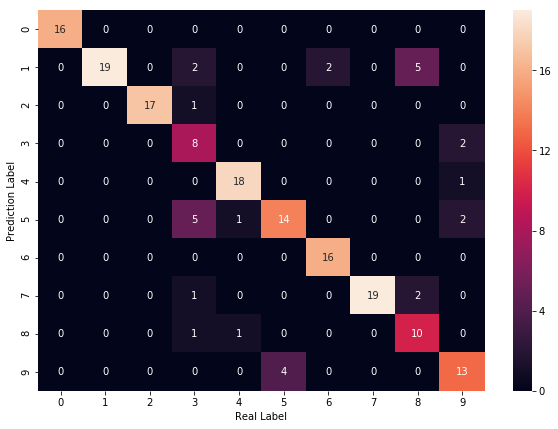

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:7 index:[5] real:5
#1 min_error:10 index:[2] real:2
#2 min_error:13 index:[1 8] real:8
#3 min_error:3 index:[0] real:0
#4 min_error:8 index:[1] real:1
#5 min_error:8 index:[7] real:7
#6 min_error:3 index:[6] real:6
#7 min_error:9 index:[3] real:3
#8 min_error:4 index:[2] real:2
#9 min_error:7 index:[1] real:1
#10 min_error:7 index:[7] real:7
#11 min_error:15 index:[5] real:4
#12 min_error:6 index:[6] real:6
#13 min_error:5 index:[3] real:3
#14 min_error:7 index:[1] real:1
#15 min_error:10 index:[3] real:3
#16 min_error:16 index:[4] real:9
#17 min_error:6 index:[1] real:1
#18 min_error:9 index:[7] real:7
#19 min_error:1 index:[6] real:6
#20 min_error:12 index:[0 8] real:8
#21 min_error:9 index:[4] real:4
#22 min_error:6 index:[3] real:3
#23 min_error:7 index:[1] real:1
#24 min_error:3 index:[4] real:4
#25 min_error:4 index:[0] real:0
#26 min_error:4 index:[5] real:5
#27 min_error:4 index:[3] real:3
#28 min_error:11 index:[1] real:6
#29 min_error:9 index:[9] real:9
#30 min_e

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8664192949907236
Avg Base Learner:0.8366522366522366


In [16]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.12222222222222222
Accuracy on training set: 0.16111111111111112
Accuracy on training set: 0.22777777777777777
Accuracy on training set: 0.24444444444444444
Accuracy on training set: 0.42777777777777776
Accuracy on training set: 0.4444444444444444
Accuracy on training set: 0.4888888888888889
Accuracy on training set: 0.48333333333333334
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.5833333333333334
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.65
Accuracy on training set: 0.7111111111111111
Accuracy on training set: 0.6888888888888889
Accuracy on training set: 0.7
Accuracy on training set: 0.7
Accuracy on training set: 0.6888888888888889
Accuracy on training set: 0.6944444444444444
Acc

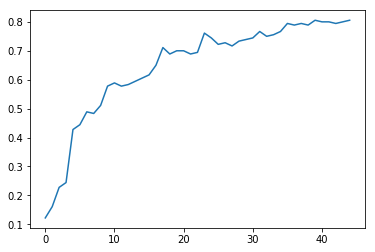

In [17]:
plt.plot(range(45),list_acc)
plt.show()

In [18]:
list_acc

[0.12222222222222222,
 0.16111111111111112,
 0.22777777777777777,
 0.24444444444444444,
 0.42777777777777776,
 0.4444444444444444,
 0.4888888888888889,
 0.48333333333333334,
 0.5111111111111111,
 0.5777777777777777,
 0.5888888888888889,
 0.5777777777777777,
 0.5833333333333334,
 0.5944444444444444,
 0.6055555555555555,
 0.6166666666666667,
 0.65,
 0.7111111111111111,
 0.6888888888888889,
 0.7,
 0.7,
 0.6888888888888889,
 0.6944444444444444,
 0.7611111111111111,
 0.7444444444444445,
 0.7222222222222222,
 0.7277777777777777,
 0.7166666666666667,
 0.7333333333333333,
 0.7388888888888889,
 0.7444444444444445,
 0.7666666666666667,
 0.75,
 0.7555555555555555,
 0.7666666666666667,
 0.7944444444444444,
 0.7888888888888889,
 0.7944444444444444,
 0.7888888888888889,
 0.8055555555555556,
 0.8,
 0.8,
 0.7944444444444444,
 0.8,
 0.8055555555555556]